<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/short-labs-pandas/Hanushek_hypothesis(Ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url_test = "https://raw.githubusercontent.com/it-ces/Datasets/main/icfesSaber11_20202.csv"
url_gdps =  "https://raw.githubusercontent.com/it-ces/Datasets/main/Dpto-gdps.csv"

In [5]:
df_test = pd.read_csv(url_test)
df_gdps = pd.read_csv(url_gdps)

In [6]:
df_test.columns

Index(['Unnamed: 0', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
       'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION', 'PUNT_MATEMATICAS',
       'PUNT_GLOBAL'],
      dtype='object')

In [7]:
df_test['COLE_DEPTO_UBICACION'].nunique()

33

In [8]:
df_test['dpto_score'] = df_test.groupby(by=['COLE_DEPTO_UBICACION'])['PUNT_MATEMATICAS'].transform('mean')

In [9]:
df_test = df_test[['COLE_DEPTO_UBICACION', 'dpto_score']]

In [10]:
df_test = df_test[-df_test.duplicated(subset=['COLE_DEPTO_UBICACION'])]

In [11]:
df_test

,COLE_DEPTO_UBICACION,dpto_score
0,CALDAS,51.013277
1,BOGOTÁ,54.910477
4,TOLIMA,49.570133
5,CESAR,49.316756
6,ANTIOQUIA,49.638535
9,CAUCA,47.442699
10,CUNDINAMARCA,53.431499
13,ATLANTICO,50.190611
14,META,52.188380
15,RISARALDA,51.589427


In [13]:
df_gdps['dpto-gdp-mean'] = df_gdps[['2021p', '2022p']].mean(axis=1)

In [14]:
df_gdps = df_gdps[['DEPARTAMENTOS', 'dpto-gdp-mean']]

In [15]:
df_gdps

,DEPARTAMENTOS,dpto-gdp-mean
0,COLOMBIA,2.588502e+07
1,Amazonas,1.192556e+07
2,Antioquia,2.887136e+07
3,Arauca,2.555778e+07
4,Atlántico,2.110325e+07
5,Bogotá D.C.,4.234105e+07
6,Bolívar,2.118528e+07
7,Boyacá,2.752688e+07
8,Caldas,2.107601e+07
9,Caquetá,1.231461e+07


In [16]:
names_test = df_test['COLE_DEPTO_UBICACION'].unique()
names_gdps = df_gdps['DEPARTAMENTOS'].unique()

In [17]:
print(set(names_test) - set(names_gdps))
print(set(names_gdps)- set(names_test))

{'BOYACA', 'SUCRE', 'ARAUCA', 'RISARALDA', 'CASANARE', 'CUNDINAMARCA', 'HUILA', 'ANTIOQUIA', 'VAUPES', 'QUINDIO', 'BOGOTÁ', 'CALDAS', 'CESAR', 'META', 'AMAZONAS', 'SAN ANDRES', 'PUTUMAYO', 'ATLANTICO', 'VICHADA', 'VALLE', 'NORTE SANTANDER', 'GUAVIARE', 'BOLIVAR', 'CORDOBA', 'NARIÑO', 'CAQUETA', 'MAGDALENA', 'CAUCA', 'TOLIMA', 'CHOCO', 'GUAINIA', 'LA GUAJIRA', 'SANTANDER'}
{'Risaralda', 'Meta', 'Tolima', 'Amazonas', 'Vichada', 'Cesar', 'Guainía', 'Guaviare', 'San Andrés, Providencia y Santa Catalina (Archipiélago)', 'Córdoba', 'Nariño', 'Norte de Santander', 'Chocó', 'La Guajira', 'Cauca', 'Antioquia', 'Quindío', 'Bolívar', 'Caquetá', 'Casanare', 'Santander', 'COLOMBIA', 'Huila', 'Arauca', 'Atlántico', 'Cundinamarca', 'Valle del Cauca', 'Putumayo', 'Caldas', 'Magdalena', 'Bogotá D.C.', 'Boyacá', 'Vaupés', 'Sucre'}


In [18]:
def clean_str(string):
  string = string.upper()
  string = string.replace("Á", "A")
  string = string.replace("É", "E")
  string = string.replace("Í", "I")
  string = string.replace("Ó", "O")
  string = string.replace("Ú", "U")
  return string

In [19]:
df_gdps['DEPARTAMENTOS'] = df_gdps['DEPARTAMENTOS'].apply(lambda x : clean_str(x))

In [20]:
names_test = df_test['COLE_DEPTO_UBICACION'].unique()
names_gdps = df_gdps['DEPARTAMENTOS'].unique()
print(set(names_test) - set(names_gdps))
print(set(names_gdps)- set(names_test))

{'NORTE SANTANDER', 'SAN ANDRES', 'BOGOTÁ', 'VALLE'}
{'NORTE DE SANTANDER', 'SAN ANDRES, PROVIDENCIA Y SANTA CATALINA (ARCHIPIELAGO)', 'BOGOTA D.C.', 'COLOMBIA', 'VALLE DEL CAUCA'}


In [21]:
book = {'BOGOTA D.C.':'BOGOTÁ',
        'VALLE DEL CAUCA':'VALLE',
        'NORTE DE SANTANDER': 'NORTE SANTANDER',
        'SAN ANDRES, PROVIDENCIA Y SANTA CATALINA (ARCHIPIELAGO)':'SAN ANDRES'}

In [22]:
df_gdps.replace(book, inplace=True)

In [23]:
names_test = df_test['COLE_DEPTO_UBICACION'].unique()
names_gdps = df_gdps['DEPARTAMENTOS'].unique()
print(set(names_test) - set(names_gdps))
print(set(names_gdps)- set(names_test))

set()
{'COLOMBIA'}


In [24]:
df_gdps.columns

Index(['DEPARTAMENTOS', 'dpto-gdp-mean'], dtype='object')

In [25]:
df_test.columns

Index(['COLE_DEPTO_UBICACION', 'dpto_score'], dtype='object')

In [26]:
full = df_gdps.merge(df_test,left_on = 'DEPARTAMENTOS', right_on='COLE_DEPTO_UBICACION',
              suffixes=('', 'duplicated'))

In [27]:
full

,DEPARTAMENTOS,dpto-gdp-mean,COLE_DEPTO_UBICACION,dpto_score
0,AMAZONAS,1.192556e+07,AMAZONAS,44.503175
1,ANTIOQUIA,2.887136e+07,ANTIOQUIA,49.638535
2,ARAUCA,2.555778e+07,ARAUCA,49.835681
3,ATLANTICO,2.110325e+07,ATLANTICO,50.190611
4,BOGOTÁ,4.234105e+07,BOGOTÁ,54.910477
5,BOLIVAR,2.118528e+07,BOLIVAR,47.037290
6,BOYACA,2.752688e+07,BOYACA,54.366490
7,CALDAS,2.107601e+07,CALDAS,51.013277
8,CAQUETA,1.231461e+07,CAQUETA,48.762942
9,CASANARE,4.390706e+07,CASANARE,51.844047


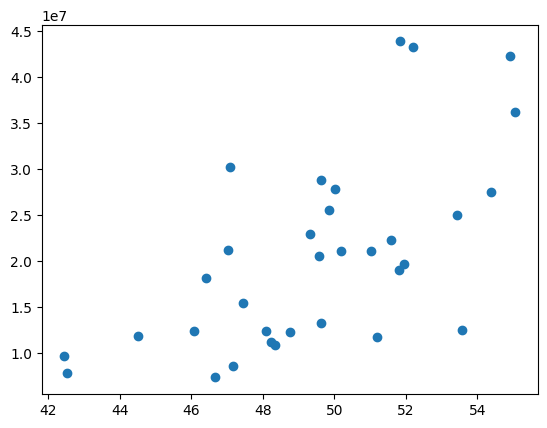

In [28]:
plt.scatter(full['dpto_score'], full['dpto-gdp-mean'])

In [29]:
full[['dpto_score', 'dpto-gdp-mean' ]].corr()

,dpto_score,dpto-gdp-mean
dpto_score,1.000000,0.628223
dpto-gdp-mean,0.628223,1.000000


In [31]:
full[['dpto_score', 'dpto-gdp-mean' ]].corr(method='spearman')

,dpto_score,dpto-gdp-mean
dpto_score,1.000000,0.636029
dpto-gdp-mean,0.636029,1.000000
